In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

from utils.CaImageCSV import CaImageCSV
import utils.sulfur.constant as const

In [2]:
all_event_rate_df = pd.read_csv('./resources/event_rates/oasis_by_cells/all_event_rates_threshold005.csv', index_col=[0], header=[0])
engram_event_rate_df = pd.read_csv('./resources/event_rates/oasis_by_cells/engram_event_rates_threshold005.csv', index_col=[0], header=[0])
non_engram_event_rate_df = pd.read_csv('./resources/event_rates/oasis_by_cells/non_engram_event_rates_threshold005.csv', index_col=[0], header=[0])

In [3]:
engram_data = engram_event_rate_df.loc[:, 'HC1':'A1postES']
non_engram_data = non_engram_event_rate_df.loc[:, 'HC1':'A1postES']

In [4]:
def diff_char(pvalue):
    if pvalue <= 0.0001:
        return '****'
    elif pvalue <= 0.001:
        return '***'
    elif pvalue <= 0.01:
        return '**'
    elif pvalue <= 0.05:
        return '*'
    else:
        return 'n.s'

In [5]:
def show_diff_label(x, y, label):
    return ''

In [14]:
def view_diff_bar(diff_engram_pre, diff_engram_post, diff_non_engram_pre, diff_non_engram_post):
    plt.figure(figsize=(10, 10))

    left = np.arange(2)
    width = 0.4
    
    _, pre_pvalue = ttest_ind(diff_engram_pre, diff_non_engram_pre, equal_var=False)
    _, post_pvalue = ttest_ind(diff_engram_post, diff_non_engram_post, equal_var=False)
    
    print(pre_pvalue)
    print(post_pvalue)
    
    pre_diff_char = diff_char(pre_pvalue)
    post_diff_char = diff_char(post_pvalue)
    
    print(pre_diff_char)
    print(post_diff_char)
    
    plt.bar(x=left-width, height=[diff_engram_pre.mean(), diff_engram_post.mean()], capsize=2, width=width, label='engram', color='royalblue')
    plt.bar(x=left, height=[diff_non_engram_pre.mean(), diff_non_engram_post.mean()], capsize=2, width=width, label='non-engram', color='tomato')
    plt.xticks([-0.2, 0.80], ['HC1 v.s A1preES', 'HC1 v.s A1postES'])
    plt.legend()
    plt.show()

In [15]:
engram_hc1_vs_preES = engram_data['A1preES'] / engram_data['HC1']
non_engram_hc1_vs_preES = non_engram_data['A1preES'] / non_engram_data['HC1']

engram_hc1_vs_postES = engram_data['A1postES'] / engram_data['HC1']
non_engram_hc1_vs_postES = non_engram_data['A1postES'] / non_engram_data['HC1']

0.13320375973699233
0.16578864403569096
n.s
n.s


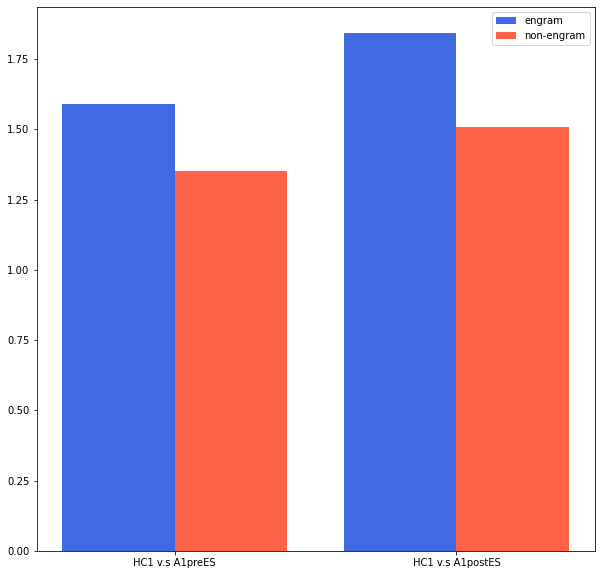

In [16]:
view_diff_bar(engram_hc1_vs_preES, engram_hc1_vs_postES, non_engram_hc1_vs_preES, non_engram_hc1_vs_postES)

0.3377843599498317
0.28331632362807346
n.s
n.s


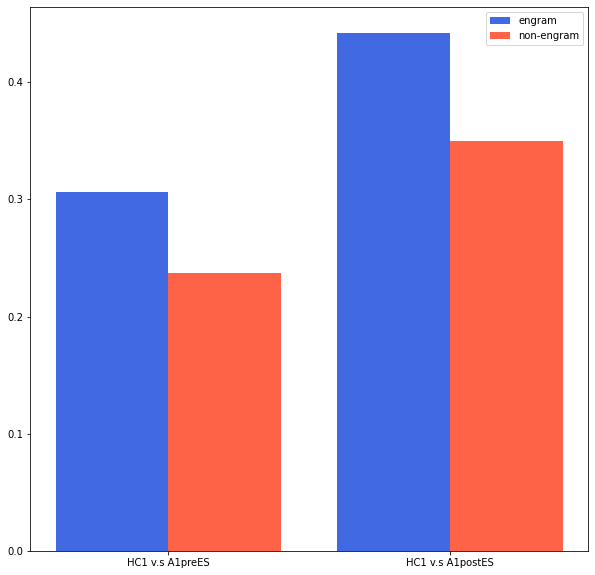

In [17]:
engram_hc1_vs_preES = engram_data['A1preES'] - engram_data['HC1']
non_engram_hc1_vs_preES = non_engram_data['A1preES'] - non_engram_data['HC1']

engram_hc1_vs_postES = engram_data['A1postES'] - engram_data['HC1']
non_engram_hc1_vs_postES = non_engram_data['A1postES'] - non_engram_data['HC1']

view_diff_bar(engram_hc1_vs_preES, engram_hc1_vs_postES, non_engram_hc1_vs_preES, non_engram_hc1_vs_postES)

0.133203759736992
0.16578864403569143
n.s
n.s


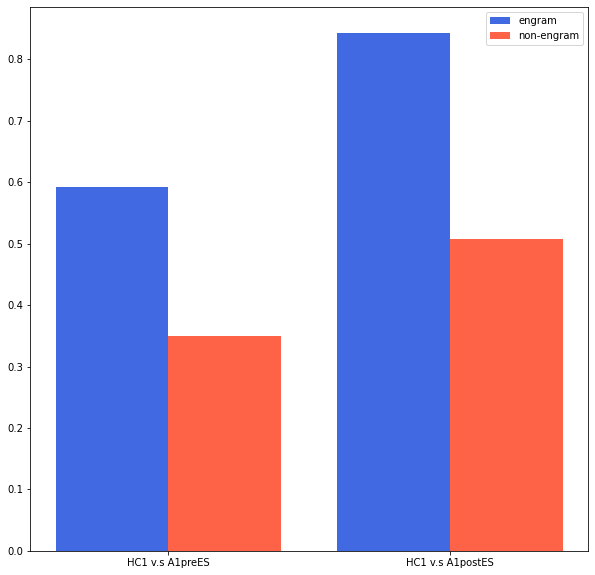

In [18]:
engram_hc1_vs_preES = (engram_data['A1preES'] - engram_data['HC1']) / engram_data['HC1']
non_engram_hc1_vs_preES = (non_engram_data['A1preES'] - non_engram_data['HC1']) / non_engram_data['HC1']

engram_hc1_vs_postES = (engram_data['A1postES'] - engram_data['HC1']) / engram_data['HC1']
non_engram_hc1_vs_postES = (non_engram_data['A1postES'] - non_engram_data['HC1']) / non_engram_data['HC1']

view_diff_bar(engram_hc1_vs_preES, engram_hc1_vs_postES, non_engram_hc1_vs_preES, non_engram_hc1_vs_postES)

0.13873795338761194
0.13549544952208414
n.s
n.s


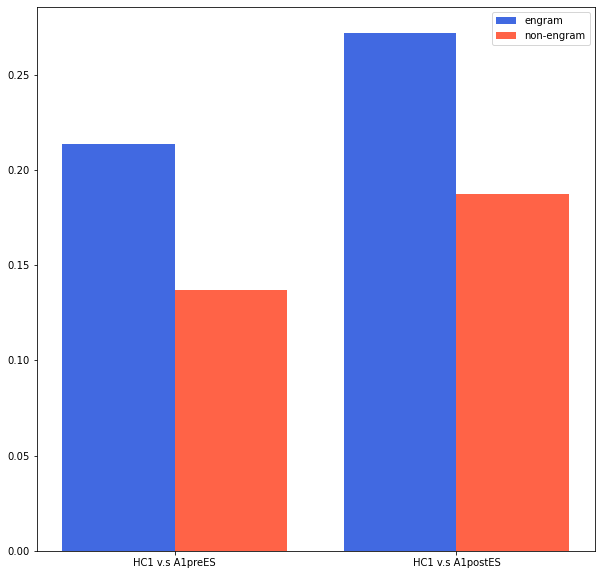

In [19]:
engram_hc1_vs_preES = (engram_data['A1preES'] - engram_data['HC1']) / (engram_data['A1preES'] + engram_data['HC1'])
non_engram_hc1_vs_preES = (non_engram_data['A1preES'] - non_engram_data['HC1']) / (non_engram_data['A1preES'] + non_engram_data['HC1'])

engram_hc1_vs_postES = (engram_data['A1postES'] - engram_data['HC1']) / (engram_data['A1postES'] + engram_data['HC1'])
non_engram_hc1_vs_postES = (non_engram_data['A1postES'] - non_engram_data['HC1']) / (non_engram_data['A1postES'] + non_engram_data['HC1'])

view_diff_bar(engram_hc1_vs_preES, engram_hc1_vs_postES, non_engram_hc1_vs_preES, non_engram_hc1_vs_postES)